# Работа с библиотекой SymPy

### Инициализация

Наиболее удобным способом работы с библиотекой SymPy является использование `jupyter-notebook`. При этом для визуализации математических формул желательно наличие работоспособного дистрибутива LaTeX. Начинать работу следует с инициализации, которая часто будет сводиться к выполнению следующих трёх команд:

In [1]:
from sympy import *
init_printing()
%matplotlib inline

In [2]:
var('K1 K2 K3 K4 K5 K6 K7 f1 a b c d')
(K5|K6)&(K1|K2)&(K1|K5)&(K4|K3)&(K3|K6)&(K2|K4)&(K5|K7)&(K6|K7)&K7
# f1 = f1.subs({K1: ~K1,K2: ~K2,K3: ~K3,K4: ~K4,K5: ~K5,K6: ~K6,K7: ~K7})
# f1 = to_cnf(~f1)
# f1 = f1.subs({K1: ~a&~b&c,K2: ~a&c&~d,K3: ~a&b&~c,K4: ~a&b&~d,K5: ~b&d,K6: ~c&d,K7: a&d})
# print(f1)
# print(simplify((a & d) | (d & ~b) | (b & ~a & ~c) | (c & ~a & ~d)))

In [3]:
f1 = simplify((K5|K6)&(K1|K2)&(K1|K5)&(K4|K3)&(K3|K6)&(K2|K4)&(K5|K7)&(K6|K7)&K7)
# f1 = f1.subs({K1: ~K1,K2: ~K2,K3: ~K3,K4: ~K4,K5: ~K5,K6: ~K6,K7: ~K7})
# f1 = to_cnf(~f1)
# f1 = f1.subs({K1: ~a&~b&c,K2: ~a&c&~d,K3: ~a&b&~c,K4: ~a&b&~d,K5: ~b&d,K6: ~c&d,K7: a&d})
to_dnf(f1)
# print(f1)
# print(simplify((a & d) | (d & ~b) | (b & ~a & ~c) | (c & ~a & ~d)))

In [4]:
f1 = simplify((K5|K6)&(K1|K2)&(K1|K5)&(K4|K3)&(K3|K6)&(K2|K4)&(K5|K7)&(K6|K7)&K7)
# f1 = f1.subs({K1: ~K1,K2: ~K2,K3: ~K3,K4: ~K4,K5: ~K5,K6: ~K6,K7: ~K7})
# f1 = to_cnf(~f1)
# f1 = f1.subs({K1: ~a&~b&c,K2: ~a&c&~d,K3: ~a&b&~c,K4: ~a&b&~d,K5: ~b&d,K6: ~c&d,K7: a&d})
to_dnf(f1, simplify=True)
# print(f1)
# print(simplify((a & d) | (d & ~b) | (b & ~a & ~c) | (c & ~a & ~d)))

In [5]:
f1

Первая из этих трёх команд подключает библиотеку SymPy.

Если закомментировать вторую команду, добавив перед ней  символ `#`, то математические формулы не будут выглядеть естественно (обязательно попробуйте это сделать). 

Третья команда нужна только в случае работы с библиотекой matplotlib, которую SymPy неявно использует при построении графиков функций. После выполнения этой команды все графики будут «встраиваться» в блокнот.

Если желательно открытие отдельного окна, в котором будет показываться график (у этого варианта имеются определённые достоинства), то следует воспользоваться командой `%matplotlib qt`. **Это не работает на «Подспорье» — необходим запуск Jupyter Notebook на локальном компьютере!**


### Числа языка Python и числа в SymPy

С целыми числами можно работать и без использования библиотеки SymPy:

In [6]:
2**200

Если результат выполнения команды имеет слишком большую длину, то он может оказаться неудобным для восприятия:

In [7]:
2**1000

В зависимости от используемых настроек визуализации математики может либо появляться горизонтальная полоса 
прокрутки, либо выводимый текст будет становиться очень мелким.
Эти настройки можно менять с помощью клика правой кнопки мыши на поле вывода математики 
(меню `Math settings | Math Renderer`). По умолчанию мы используем `SVG`, который позволяет получить наиболее
качественную визуализацию математических формул.

Для получения более удобного для восприятия вывода результата можно использовать функцию `print`:

In [8]:
print(2**1000)

10715086071862673209484250490600018105614048117055336074437503883703510511249361224931983788156958581275946729175531468251871452856923140435984577574698574803934567774824230985421074605062371141877954182153046474983581941267398767559165543946077062914571196477686542167660429831652624386837205668069376


Важно понимать, что числа языка Python и числа в SymPy **являются объектами разных типов**. Для получения из обычных чисел, строк и иных объектов «символьных сущностей» используются почти идентичные друг другу функции `S` и `sympify`. Разницу между «обычными» числами и «числами библиотеки SymPy» показывают следующие примеры.

In [9]:
type(1)

int

In [10]:
type(S(1))

sympy.core.numbers.One

In [11]:
type(sympify(1))

sympy.core.numbers.One

In [12]:
type(S(1.2))

sympy.core.numbers.Float

Вычисления с простыми дробями в SymPy проводятся точно:

In [13]:
 S(1)/3+S(4)/3

Функция `N` и метод `evalf` позволяют получить численное значение выражения, при этом второй аргумент функции `N` и (единственный) аргумент метода `evalf` определяют количество *значащих цифр* в результате. Функция `N` сама преобразует свой первый аргумент к одному из типов библиотеки SymPy, а метод `evalf` может быть применён только к «числам библиотеки SymPy»:

In [14]:
N(5/3, 5)

In [15]:
(S(5)/S(3)).evalf(15)

«Обычные» действительные числа хранятся в компьютере с ограниченной точностью и поэтому попытка вывода большого количества цифр такого числа приводит к получению «мусора»:

In [16]:
N(5/3, 50)

Деление «числа библиотеки SymPy» даже на обычное целое число в качестве результата порождает «число библиотеки SymPy», у которого можно получить сколь угодно много точных цифр после запятой:

In [17]:
N(S(5)/3, 50)

### Математические константы

In [18]:
pi

In [19]:
pi.evalf()

In [20]:
N(pi,100)

In [21]:
E

In [22]:
N(E,100)

In [23]:
sqrt(pi)

In [24]:
sqrt(pi).evalf()

In [25]:
I

In [26]:
I**2

In [27]:
E**(I*pi)

### Переменные и выражения

Для работы с символьными переменными необходимо объявлять их с помощью метода `symbols` или `var` (последний вариант удобнее и мы обычно будем использовать именно его):

In [28]:
var('a b c d')

После этого можно конструировать любые символьные выражения:

In [29]:
 e = (a + b)**2/(c-3)

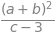

In [30]:
e

Подстановка в выражение определённых значений переменных выполняется с помощью метода `subs`:

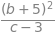

In [31]:
e.subs(a,5)

В случае подстановки значений нескольких переменных в качестве аргумента `subs` следует использовать так называемы словарь (dict)
языка Python: в фигурных скобках через запятую перечисляются пары — `переменная: значение`.

In [32]:
e.subs({a: 5, b: -3})

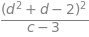

In [33]:
e.subs({a: d-2, b: d*d})

SymPy позволяет удобно работать с многочленами:

In [34]:
var('t')
q = t**3-3*t**2+4*t-7

In [35]:
q

In [36]:
q**2

Раскрыть скобки позволяет функция `expand`:

In [37]:
expand(q**2)

Факторизация — разложение на множители — выполняется функцией `factor`:

In [38]:
factor(t**3-1)

Вот примеры работы с некоторыми элементарными функциями: 

In [39]:
 sin(1)

In [40]:
N(sin(1),20)

In [41]:
sin(pi/2)

In [42]:
 sin(t)**2 + cos(t)**2

In [43]:
simplify(sin(t)**2 + cos(t)**2)

In [44]:
log(2)

In [45]:
log(E**3)

### Решение уравнений

Для символьного решения уравнений следует использовать функцию `solveset`, возвращающую множество корней уравнения. При этом обычно в качестве первого аргумента этой функции указывают только левую часть уравнения (в предположении, что правая равна нулю). Второй аргумент — переменная, относительно которой решается уравнение.

In [46]:
solveset(t**2 - 7*t + 12, t)

Соотношение $t-t = 0$ выполнено при любом допустимом значении $t$. Множество этих значений (область определения) задают явно:

In [47]:
solveset(t - t, t, domain = S.Reals)

In [48]:
solveset(t - t + 1, t, domain = S.Reals)

Множество натуральных чисел $\mathbb N$ в SymPy обозначается как `S.Naturals`, целых неотрицательных $\mathbb Z_0$ — `S.Naturals0`, целых $\mathbb Z$ — `S.Integers`. По умолчанию областью определения является множество комплексных чисел $\mathbb C$ (`domain = S.Complexes`):

In [49]:
solveset(t*t + 1, t)

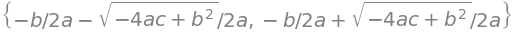

In [50]:
solveset(a*t**2 + b*t + c, t)

In [51]:
solveset(sin(t) - 1, t, domain = S.Reals)

In [52]:
var('w')
w = log(t - 1) / log(3)
solveset(w**2 - 4*w + 3, t)

Функция `nroots` позволяет получить приближённые значения корней *многочлена* с заданным числом значащих цифр:

In [53]:
nroots(t*t - 2, 10)

С помощью функции `linsolve` можно решать системы линейных уравнений:

In [54]:
var('u v')
linsolve([u - 2*v, 3*u + v - 7], u, v)

### Построение графиков функций

Библиотека `SymPy` позволяет строить графики функций заданных явными формулами, неявными соотношениями или параметрически. В этом заключается её основное преимущество перед иными способами построения графиков в Python-средах, которые требуют обязательного вычисления координат точек, образующих искомый график.

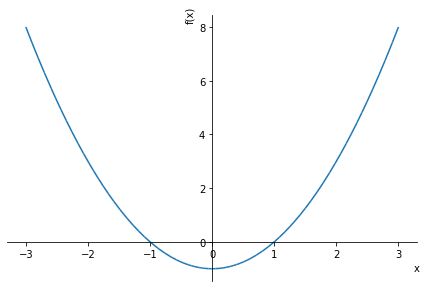

In [55]:
var('x')
plot(x*x - 1, (x, -3, 3))

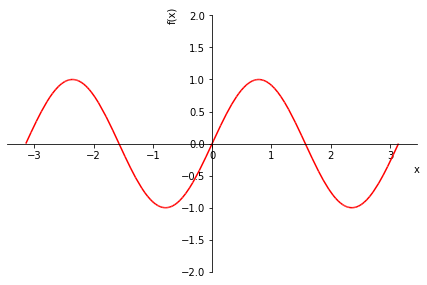

In [56]:
p = plot(sin(2*x), (x,-pi,pi), ylim = (-2,2), line_color = 'r')

Обратите внимание на тот факт, что мы указали лишь желаемые границы изменения переменных `x` и `y`, а наиболее подходящий масштаб по осям был выбран автоматически.

В следующем примере на одной системе координат рисуется сразу несколько графиков, изображаемых различными цветами.

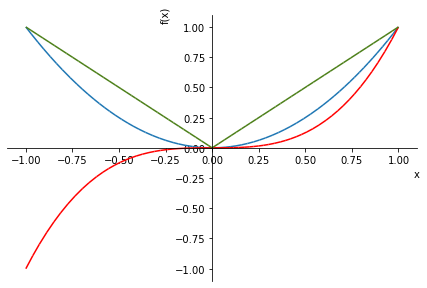

In [57]:
p1 = plot(x**2, (x,-1,1), show = False)
p1.line_color = 'cyan'
p2 = plot(x**3, (x,-1,1), show=False, line_color = 'r')
p3 = plot(Abs(x), (x,-1,1), show=False, line_color = (0.3,0.5,0.1))
p1.extend(p2)
p1.extend(p3)
p1.show()

График функции $y=|x|$ выглядит странно при использовании разных масштабов по осям координат, поэтому здесь разумно сделать масштаб одинаковым.

Из-за не до конца выполненной работы по совершенствованию библиотеки SymPy добиться одинакового масштаба по осям пока можно только с помощью весьма нетривиальных «заклинаний», приведённых ниже (этот код должен работать для разных версий библиотеки). Они выполняют вызовы методов библиотеки matplotlib, с которой мы познакомимся позже. Пока можно не разбираться в этих «заклинаниях», так как в ближайшее время разработчики обещают улучшить ситуацию.

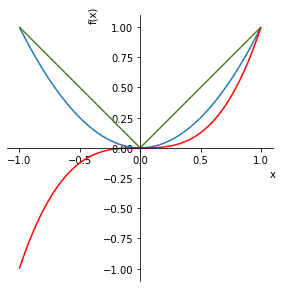

In [58]:
fig = p1._backend.fig
ax = p1._backend.ax
if type(ax) == list:
    ax = ax[0]
ax.set_aspect('equal')
fig

А вот так можно построить график функции, заданной неявно. Здесь просто необходимо использовать одинаковый масштаб по осям, так как иначе вместо окружности мы получаем эллипс.

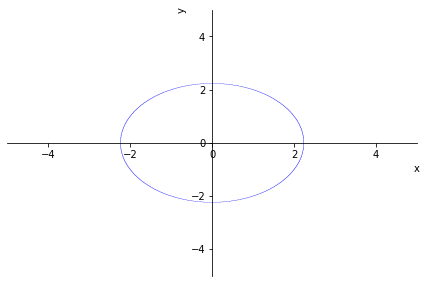

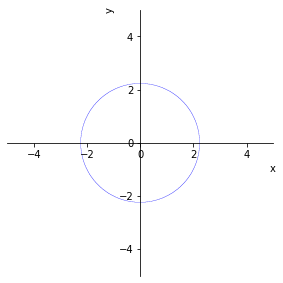

In [59]:
var('y')
p = plot_implicit(x**2 + y**2 - 5)
fig = p._backend.fig
ax = p._backend.ax
if type(ax) == list:
    ax = ax[0]
ax.set_aspect('equal')
fig

Подобным образом можно строить графики функций, заданных параметрически. В нижеприведённом примере можно и не изменять масштаб, используемый по умолчанию.

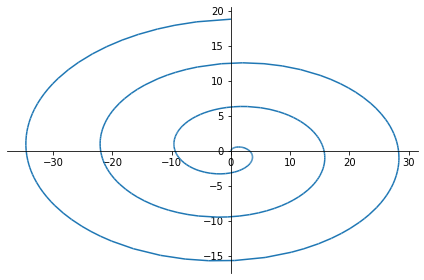

In [60]:
plotting.plot_parametric(2*t*sin(t), t*cos(t), (t, 0, 6*pi))

Для построения графиков в полярных координатах следует воспользоваться равенствами $x = r \cos(\varphi)$, $y = r \sin(\varphi)$ и функцией `plot_parametric`:

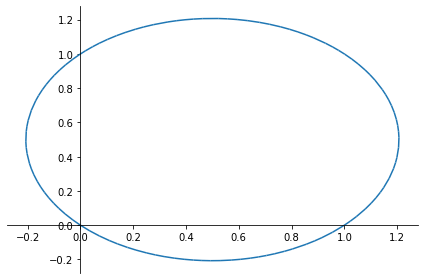

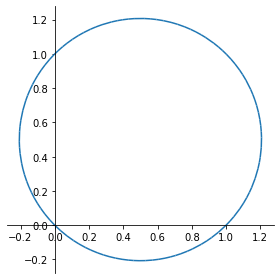

In [61]:
var('phi')
r = sin(phi) + cos(phi)
p = plotting.plot_parametric((r*cos(phi), r*sin(phi)), (phi, 0, pi))
fig = p._backend.fig
ax = p._backend.ax
if type(ax) == list:
    ax = ax[0]
ax.set_aspect('equal')
fig

Библиотека SymPy позволяет строить также и графики функций двух переменных — поверхности в трёхмерном пространстве:

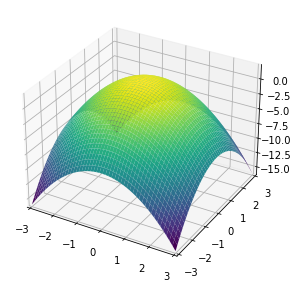

In [62]:
plotting.plot3d(2 - x**2 - y**2, (x,-3,3), (y, -3, 3))